<!--- mission_number=7 file_list=["attemptdata.json","progressdata.json","sessiondata.json"] mode="multiscreen" premium=False --->

# Learning analytics intro
## A look at anonymous student data from dataquest.io
## Vik Paruchuri

<!--- type="code" --->

# Before we start

Before we get started looking at data, let's take a quick look at the dataquest platform, so we have more context in which to place the data.  

We are currently inside of a *mission*.  Missions are structured around datasets, and teach several skills.  Each mission consists of multiple screens, each of which teaches something needed to answer a question about the data.

This screen is a code screen.  You can also have video and text screens.  Code screens usually require you to write an answer, which the system checks for correctness.

All coding is done in *python 3*.  Don't worry if you don't know python -- you won't be expected to write any complex code.

Let's do a quick exercise to see how getting an answer correct looks.

## Instructions

Type in `print(5)` to have python print out the number 5, then hit the "Run" button in the bottom left.  `5` will appear in the output pane at the top right.

## Hint

Just type `print(5)`.  You can do this!

In [1]:
## Display

# This is the code area, where you can type and execute code.
# You can assign values to variables here, or anything else you want to do.
# Anything that starts with a # is a comment, and is used for explanation, but isn't executed as code.
# In this lesson, there are also sometimes questions to think about in the comments.

# See how the value for a shows up in the bottom right?  
# That section lets us see variables that are defined in the code.
a = 5

## Answer

print(5)

## Check val

5

5


5

<!--- type="code" --->

# Answer checking

In the last screen, the system checked the output of our script.  We can also check for the value of a given variable.  In this screen, the variable `b` will be checked to see if it equals `10`.  We can also do more complex checks for correctness than this.

## Instructions

Assign the value `10` to the variable `b`.  You can do this with `b = 10`.

## Hint

Just type `b = 10` in the code area, and hit "Run".

In [2]:
## Display

b = 0

## Answer

b = 10

## Check vars

["b"]

['b']

<!--- type="code" --->

# Looking at student data

To make things easier, from this screen on, you won't be required to enter an answer.  If you know python, feel free to type and run any code you want -- you don't have to restrict yourself to the analysis shown on any of the screens.

We have some anonymized student data that we want to take a deeper look at. Dataquest, like most online learning platforms, has data scattered across multiple silos.

Some data that is important to the student learning experience is stored in the database.  Other data, that is less important for operation of the site, is stored elsewhere (we'll talk about this later on).

The data we'll look at is from the database, and consists of *progress* data, which stores whether or not a student successfully completed a screen, and what code they wrote.  Progress records are unique to a student and a screen -- by completing the last two screens, each of you generated two new progress records!

It also has *attempt* data, which contains a record of each attempt the student made, and what code they wrote.  Each *attempt* record is linked to a progress record -- one progress record can have multiple attempts.  This is how we store a student's current state on a screen, and still keep a record of all their attempts.

We've exported the data as a [json](http://json.org/) object to make it possible to analyze.  Ordinarily, we would run SQL queries against a database, but it's not practical in this case to get that access.

JSON is a file format, much like csv, but with more metadata stored.  The nice thing about JSON is that python and other languages can parse and display it very easily.

In order to make things quicker to analyze, we've randomly sampled data from `50` students only.

In [3]:
## Initial
import json

with open("attemptdata.json") as f:
    attempts = json.load(f)
    
with open("progressdata.json") as f:
    progress = json.load(f)
    
def pretty_print(data):
    print(json.dumps(data, sort_keys=True, indent=4, separators=(',', ': ')))

## Display

# The attempts are stored in the attempts variable, and progress is stored in the progress variable.

# Here's how one progress object looks.
print("Progress Record:")
pretty_print(progress[0])
print("\n")

# Here's how one attempt looks.
print("Attempt Record:")
pretty_print(attempts[0])

Progress Record:
{
    "fields": {
        "attempts": 0,
        "complete": true,
        "created": "2015-04-07T21:21:57.316Z",
        "last_code": "# We'll be coding in python.\n# Python is a great general purpose language, and is used in a lot of data science and machine learning applications.\n# If you don't know python, that's okay -- important concepts will be introduced as we go along.\n# In python, any line that starts with a # is called a comment, and is used to put in notes and messages.\n# It isn't part of the code, and isn't executed.",
        "last_context": null,
        "last_correct_code": "# We'll be coding in python.\n# Python is a great general purpose language, and is used in a lot of data science and machine learning applications.\n# If you don't know python, that's okay -- important concepts will be introduced as we go along.\n# In python, any line that starts with a # is called a comment, and is used to put in notes and messages.\n# It isn't part of the code,

<!--- type="code" --->

# Quick data structure overview

Let's take a quick look at the data structure, and see how we can access the fields inside each record.  This will help us as we analyze the data.

Both the progess and attempt records have multiple fields.  We'll skip over explaining some of them, but here are partial lists of what they are:

*Progress fields*

* `attempts` -- a count of how many attempts the student made
* `complete` -- whether the student successfully passed the screen (true/false)
* `created` -- when the student first saw the screen
* `last_code` -- the last code the student wrote
* `last_correct_code` -- the last code that was correct
* `screen` -- the id of the screen this progress is associated with
* `user` -- the id of the user this progress is associated with

*Attempt fields*

* `code` -- the code that was submitted for this attempt
* `correct` -- whether or not the student got the answer right

In [4]:
# Prints the first attempt record in our list -- we start counting at zero
# The attempt record is stored as something called a python dictionary
print(attempts[0])
print("\n")

# Prints the second attempt record
print(attempts[1])
print("\n")

# We can extract values from a python dictionary by their names
# This gets the pk attribute from the first record
print(attempts[0]["pk"])
print("\n")

# This gets the fields attribute from the first attempt, and prints it
# As you can see, fields is another dictionary (you can have dictionaries inside dictionaries)
print(attempts[0]["fields"])
print("\n")

# This gets the "correct" attribute from "fields" in the first attempt record
print(attempts[0]["fields"]["correct"])
print("\n")

# What do you think of how the data is stored in the database?
# Is there anything else you would want to store there 
# (remember that there is more analytics data elsewhere that we'll talk about later)

{'pk': 62474, 'model': 'missions.screenattempt', 'fields': {'screen_progress': 231467, 'code': "# We'll be coding in python.\n# Python is a great general purpose language, and is used in a lot of data science and machine learning applications.\n# If you don't know python, that's okay -- important concepts will be introduced as we go along.\n# In python, any line that starts with a # is called a comment, and is used to put in notes and messages.\n# It isn't part of the code, and isn't executed.", 'created': '2015-03-01T16:33:56.537Z', 'updated': '2015-03-01T16:33:56.537Z', 'correct': True}}


{'pk': 62476, 'model': 'missions.screenattempt', 'fields': {'screen_progress': 231470, 'code': '# The results area to the right will show the output of the code that is executed.\n# Output will show when you use the print function.\n# For example, the line below will print out 10.\nprint(5)\n', 'created': '2015-03-01T16:34:25.628Z', 'updated': '2015-03-01T16:34:25.628Z', 'correct': True}}


62474



<!--- type="code" --->

# Meta-analysis

We can do some interesting meta-analysis of this data.  The first thing that comes to mind is finding out, on average, how many attempts students make per screen.

In [5]:
progress_count = len(progress)
attempt_count = len(attempts)

# On average, students make about two attempts per screen
# Is there anything we can do to make this more nuanced?
print(attempt_count / progress_count)

1.8720712277413307


<!--- type="code" --->

# Correct vs incorrect?

Let's see if this attempt count differs when the student eventually got the answer correct (ie, do people who "give up" and never complete a screen make more or less attempts?).

In [6]:
correct_progress = []
incorrect_progress = []

for record in progress:
    if record["fields"]["complete"] == True:
        correct_progress.append(record)
    else:
        incorrect_progress.append(record)

# 1993 of the progress records resulted in a correct answer, and 141 did not.
# What do you think this means?
print(len(correct_progress))
print(len(incorrect_progress))

# We're stuck a bit now -- we don't know how to find out how many attempts were taken for each set.
# We need to learn a key concept before we can go further.
# We'll have to be able to match attempts to the relevant progress record.

1993
141


<!--- type="code" --->

# Matching attempts to progress

So, how do we match attempts to progress records? You may have seen a "pk" attribute when we printed the progress and attempt records.

This is the *primary key* of that record, and it's how we uniquely identify it.  Attempts are linked to progress records by the *primary key*.  We see in the attempt record, inside `fields` that there is an attribute called `screen_progress`. We can find all the attempts related to a progress object by matching the `screen_progress` attribute of the attempt to the `pk` attribute of the progress record.

In [7]:
record = progress[0]

# Get all the attempts related to the progress record
record_attempts = []
for attempt in attempts:
    if attempt["fields"]["screen_progress"] == record["pk"]:
        record_attempts.append(attempt)
        
# Print out how many attempts were made by the student this progress record is for.
print(len(record_attempts))

1


<!--- type="code" --->

# Do attempt counts differ by correctness?

Now, we know enough to figure out if attempt counts differ from screens where a student eventually got the right answer to one where they "gave up" and didn't.

In [8]:
## Initial

correct_progress = []
incorrect_progress = []

for record in progress:
    if record["fields"]["complete"] == True:
        correct_progress.append(record)
    else:
        incorrect_progress.append(record)

## Display
# Find the ids (pk) for the progress records in each set
correct_ids = [record["pk"] for record in correct_progress]
incorrect_ids = [record["pk"] for record in incorrect_progress]

correct_attempts = []
incorrect_attempts = []

# Put attempts into the right set based on which set their progress record is in.
for attempt in attempts:
    if attempt["fields"]["screen_progress"] in correct_ids:
        correct_attempts.append(attempt)
    elif attempt["fields"]["screen_progress"] in incorrect_ids:
        incorrect_attempts.append(attempt)

# People made far less attempts on screens where they eventually didn't get the answer
# This could mean a few different things.
# What do you think it could mean?
print(len(incorrect_attempts) / len(incorrect_progress))
print(len(correct_attempts) / len(correct_progress))

0.3900709219858156
1.9769192172604115


<!--- type="code" --->

# Another data store

We mentioned earlier that not all student data is stored in the database.  Some data points, like when a student started playing a video, or which button they clicked at what time, aren't relevant to the operation of the site, and thus don't need to be in the database.

These are stored in a special analytics datastore.  Typically, these are collected on the frontend of the site. Think of a website as a backend, which holds the database of student information, and the frontend, where students click and interact.  The frontend is what you see in your browser, and the backend is a server somewhere else in the world.  The frontend communicates back and forth with the backend to show the right data in the right place.

We'll be looking at a random sample of `200` student *sessions*.  A session is a period in which a student starts on dataquest, completes zero or many lessons, and then leaves.  Each session can contain many events.  There are more events than this tracked, but we've selected a few to analyze:

* `started-mission` -- a mission is started by a student
* `started-screen` -- a screen in a mission is started
* `show-hint` -- a click on the "hint" button
* `run-code` -- a click on the "run code" button
* `reset-code` -- a click on the "reset code" button
* `open-forum` -- a click on the "forum" button
* `next-screen` -- a click on the "next" button
* `interactive-mode-start` -- a click on the "debug" button
* `get-answer` -- a click on the "answer" button (shows up after 3 unsuccessful attempts)

Our session data is stored in a list of lists.  Each item in the list contains all the events that occured in the session.

200
38


(array([ 141.,   25.,    8.,    9.,   10.,    1.,    1.,    2.,    2.,    1.]),
 array([   0. ,   35.7,   71.4,  107.1,  142.8,  178.5,  214.2,  249.9,
         285.6,  321.3,  357. ]),
 <a list of 10 Patch objects>)

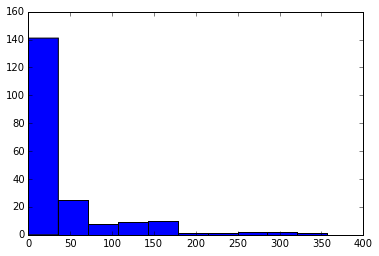

In [9]:
## Initial

import json

with open("sessiondata.json") as f:
    sessions = json.load(f)

## Display

# We have 200 sessions
print(len(sessions))

# The first session has 38 student events
print(len(sessions[0]))

# We'll make a histogram of event counts per session
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([len(s) for s in sessions])

# The plot will show up in the bottom right
# What does this distribution tell you?  Why do you think it's shaped the way it is?

<!--- type="code" --->

# Event structure

Now that we've done some meta level analysis of the events, let's take a closer look at the structure of the events themselves.

The events look a lot like the json database records we saw before.

* `event_type` -- the type of event -- there's a list in the last screen
* `created_at` -- when the event occured
* `id` -- the unique id of the event
* `sequence` -- this field varies by event type -- for `started-mission` events, it's the mission that was started.  For all other events, it's the screen that the event occured on.  Each mission consists of multiple screens.
* `mission` -- If the event occurs on a screen, then this is the mission the event occurs in.
* `type` -- the type of screen (`code`, `video`, or `text`).

In [10]:
print("Mission start event:")
pretty_print(sessions[0][0])
print("\n")

print("Screen start event:")
pretty_print(sessions[0][1])

# What do you think of these fields?
# What else would you want to track?

Mission start event:
{
    "event_type": "started-mission",
    "keen": {
        "created_at": "2015-06-12T23:09:03.966Z",
        "id": "557b668fd2eaaa2e7c5e916b",
        "timestamp": "2015-06-12T23:09:07.971Z"
    },
    "sequence": 1
}


Screen start event:
{
    "event_type": "started-screen",
    "keen": {
        "created_at": "2015-06-12T23:09:03.979Z",
        "id": "557b668f90e4bd26c10b6ed6",
        "timestamp": "2015-06-12T23:09:07.987Z"
    },
    "mission": 1,
    "sequence": 4,
    "type": "code"
}


<!--- type="code" --->

# Most common "ending" event

One interesting thing to look at is the event that students most commonly performed before they ended their session.  A session end corresponds to when learning on the platform stops, so it could be interesting if there is a pattern here.

([<matplotlib.axis.XTick at 0x107eae128>,
 <a list of 7 Text xticklabel objects>)

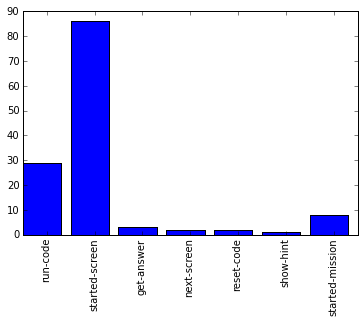

In [11]:
from collections import Counter

# Extract the last event in each session
ending_events = [s[-1] for s in sessions if len(s) > 0]

# Get the event type for all the ending events
ending_event_types = [s["event_type"] for s in ending_events]

# Count all the unique ending events
ending_event_counts = Counter(ending_event_types)

# Find all the unique events that students ended on
unique_ending_events = list(set(ending_event_types))

# Make a list of the counts corresponding to the order in unique_ending_events
y_axis = [ending_event_counts[k] for k in unique_ending_events]
x_axis = range(len(unique_ending_events))

# Make a plot of the last event types, and how often each type occured
# What does this tell you?  What more could you analyze?
plt.bar(x_axis, y_axis)
plt.xticks([x+.5 for x in x_axis], unique_ending_events, rotation=90)

<!--- type="code" --->

# Most common events

We can also look at the most common events in general, and compare the trends here to the ending event trends, to see what is over and under represented in the last screen.

([<matplotlib.axis.XTick at 0x10808ad68>,
 <a list of 9 Text xticklabel objects>)

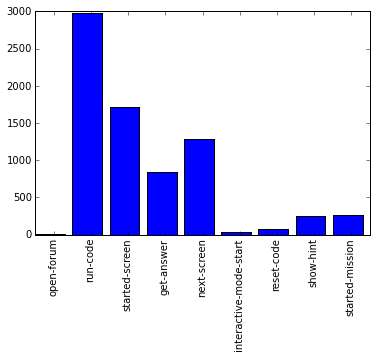

In [12]:
from itertools import chain
from collections import Counter

# Put all the sessions into one big list
all_events = chain.from_iterable(sessions)

event_types = [e["event_type"] for e in all_events]
event_counts = Counter(event_types)
unique_events = list(set(event_types))
y_axis = [event_counts[k] for k in unique_events]
x_axis = range(len(unique_events))

# Plot everything out
# This plot looks very different from the plot in the last screen.
# Why do you think this is?
plt.bar(x_axis, y_axis)
plt.xticks([x+.5 for x in x_axis], unique_events, rotation=90)

<!--- type="code" --->

# Mission numbers

We can also look at which missions most of the events occur in.  We can do this by counting the `mission` field on the events.

The earlier missions are more introductory material.

<Container object of 9 artists>

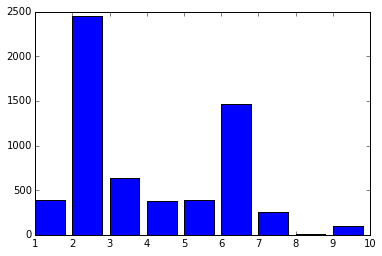

In [13]:
## Initial

from itertools import chain
from collections import Counter

# Put all the sessions into one big list
all_events = chain.from_iterable(sessions)

## Display

# Find all the mission ids
missions = [int(e["mission"]) for e in all_events if "mission" in e and int(e["mission"]) <= 10]
# Count up how many times each mission id occurs in the data
mission_counts = Counter(missions)
# Find all the unique mission ids
unique_missions = sorted(list(set(missions)))
# Setup the y axis values
y_axis = [mission_counts[k] for k in unique_missions]

# Plot everything out
# It looks like most of the events occur on the second and sixth missions.  
# Why do you think this is?
plt.bar(unique_missions, y_axis)

<!--- type="code" --->

# Event sequences

We can also look at the event sequence data.  Let's say that we want to find the average number of times students run code before they "give up" and hit the "Answer" button.  We could just scan through the event sequences, find anytime a student hit `get-answer`, and then backtrack from there to the nearest `started-screen` event.  Any `run-code` events in between are when the student tried to write code but couldn't solve the challenge.

(array([   7.,   14.,  645.,   87.,   72.,    5.,    8.,    6.,    1.,    3.]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

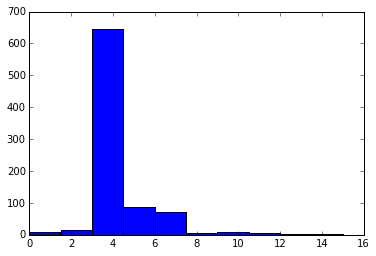

In [18]:
## Initial

from itertools import chain
from collections import Counter

# Put all the sessions into one big list
all_events = list(chain.from_iterable(sessions))

## Display

run_counts = []

# Loop through each event in the session
on_screen = False
run_counter = 0
for event in all_events:
    event_type = event["event_type"]
    # If we started a screen, set the counter to 0.
    if event_type == "started-screen":
        run_counter = 0
    # On a get answer event, if it came after we started a screen, grab the run count.
    elif event_type == "get-answer":
        run_counts.append(run_counter)
    # If we're in a screen, increment the run code counter.
    elif event_type == "run-code":
        run_counter += 1

import matplotlib.pyplot as plt

# It looks like 3-4 is the most common range -- this is when the answer button is first shown.
# But many students don't click it right away.
# What do you think about the shape of this distribution?
plt.hist(run_counts)

<!--- type="code" --->

# Explore!

Feel free to explore and find interesting patterns in the data.

Some interesting questions:

* Can we predict a student's next action based on their sequence?
* Do certain events occur more often on certain missions?
* Can we quantify mission difficulty?
* Do students write more code as they make more attempts on the same screen, or do they reduce the line count?
* What design choices should we make based on the data we've seen so far?
* What other data could we collect?

In [ ]:
# Type any code you want here.